Aqui vamos rever os seguintes conceitos de estatística:

* O que é uma distribuição?
* Quais os tipos de distribuição existentes?
* O que é a média, moda, mediana, desvio padrão?
* Normalização de dados
* Central Limit Theorem

In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns

## O que é uma distribuição?

É uma representação dos valores em um conjunto de dados e a frequência com que ocorrem.

Por exemplo, podemos jogar um par de dados e temos as seguintes possibilidades

| Soma | Frequência |
| ---- | ---------- |
| 2    | 1          |
| 3    | 1          |
| 4    | 2          |
| 5    | 2          |
| 6    | 3          |
| 7    | 3          |
| 8    | 3          |
| 9    | 2          |
| 10   | 2          |
| 11   | 1          |
| 12   | 1          |

Soma é a soma do número em cada dado. Por exemplo, se um dado caiu com 2 e o outro com 3, então soma = 5.

Frequência é a quantidade de vezes que a soma pode ocorrer. Por exemplo, 12 só pode ocorrer se os dois dados caírem com 6.
Da mesma forma, 6 pode ocorrer em caso dos dados caírem com os pares (3, 3), (4, 2) e (5, 1).

Em um "gráfico"

|  - |  - |  - |  - |  - |  - |  - |  - |  - |  - |  - |
|----|----|----|----|----|----|----|----|----|----|----|
|    |    |    |    | *  | *  | *  |    |    |    |    |
|    |    | *  | *  | *  | *  | *  | *  | *  |    |    |
| *  | *  | *  | *  | *  | *  | *  | *  | *  | *  | *  |
| 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 |

## Quantas amostras até ter uma boa distribuição?

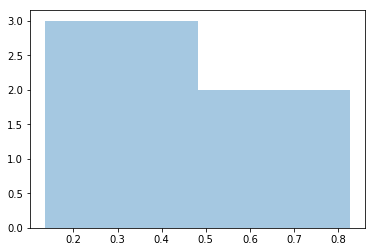

In [3]:
N = 5
x = np.random.random(size=N)
sns.distplot(x, kde=False)

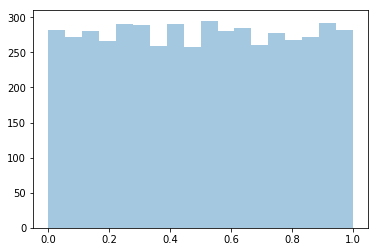

In [4]:
N = 5000
x = np.random.random(size=N)
sns.distplot(x, kde=False)

## Alguns tipos de distribuição

Em uma distribuição uniforme, todos os valores tem "a mesma probabilidade" de ocorrer.

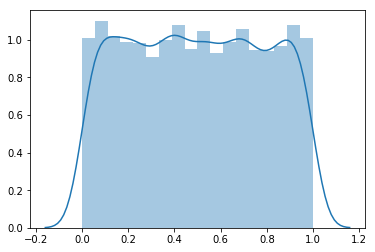

In [5]:
uniforme = np.random.uniform(size=N)
sns.distplot(uniforme, kde=True)

Em uma distribuição normal (gaussiana) os valores mais próximos de $\mu$ (média) com $\pm \sigma$ (desvio padrão) são mais frequentes.

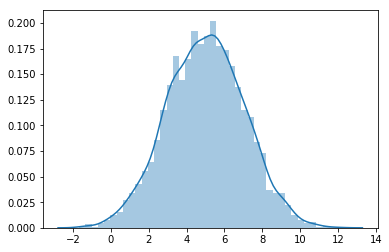

In [6]:
media = 5
desvio_padrao = 2
normal = np.random.normal(loc=media, scale=desvio_padrao, size=N)
sns.distplot(normal, kde=True)

Em uma distribuição exponencial, os valores da calda são mais frequentes.

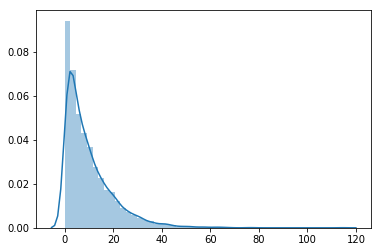

In [7]:
beta = 1.0 / 0.1
exponencial = np.random.exponential(scale=beta, size=N)
sns.distplot(exponencial, kde=True)

## Medidas de tendência central: média, moda, mediana

Estas três medidas de tendência central indicam, como é de se esperar, onde é o centro de uma distribuição.
Não é o caso de sempre ser exatamente o centro, mas a ideia é estar próximo.

In [8]:
# vamos assumir um conjunto de dados aleatórios x com N amostras

N = 1000
x = np.random.random(1000)

A média é calculada conforme $\bar{x} = \frac{1}{N}\sum_{i=1}^{N}x_i$

In [9]:
# existem algumas formas de calcular a média com python

# um for padrão
media = 0
for i in range(N):
    media += x[i]

media = (1.0 / N) * media
print(media)

# utilizando a soma
media = (1.0 / N) * sum(x)
print(media)

# utilizando a função mean
media = np.mean(x)
print(media)

0.521596074668
0.521596074668
0.521596074668


A mediana é o valor exatamente no centro do conjunto de dados. Portanto, 50% dos dados são menores que a mediana e 50% 
são maiores.

Para um conjunto com tamanho ímpar, a mediana é definida como $\hat{x} = x_{\frac{N + 1}{2}}$ sendo que x é um conjunto
ordenado.

Para um conjunto de tamanho par, a mediana é definida como $\hat{x} = \frac{1}{2} * (x_{\frac{N}{2}} + x_{\frac{N}{2} - 1})$ sendo que x é um conjunto

In [10]:
# também existem algumas formas de encontrar a variância

# ordenando e obtendo os valores
s = sorted(x)
mediana = (1.0 / 2) * (s[int(N / 2)] + s[int(N / 2) - 1])
print(mediana)

# função median
mediana = np.median(x)
print(mediana)

0.531223772005
0.531223772005


A moda é simplesmente o valor mais frequente no conjunto de dados.

In [11]:
# aqui vamos direto ao ponto
from scipy.stats import mode

moda = mode(x)
print(moda)

ModeResult(mode=array([ 0.0014021]), count=array([1]))


In [12]:
# contando os valores únicos no conjunto de dados
(unicos, quantidades) = np.unique(x, return_counts=True)
unicos.shape

(1000,)

In [13]:
# separamos os valores em 10 conjuntos
(quantidades, bins) = np.histogram(x, bins=10)

# pegamos o índice com maior quantidade de valores
indice = np.argmax(quantidades)

print(indice, indice + 1)
print(quantidades)
print(bins)

8 9
[ 90  97  85  96 107  94  91 108 118 114]
[ 0.0014021   0.10098917  0.20057625  0.30016333  0.3997504   0.49933748
  0.59892456  0.69851163  0.79809871  0.89768579  0.99727286]


## Quanto a minha distribuição está espalhada?

A variância e o desvio padrão ajudam a entender como os dados estão organizados.

Principalmente se a distribuição seguir a forma de uma distribuição normal.

A variância é a média dos desvios em relação à média do conjunto.

Calculamos a variância como: $x_\text{var} = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{x})^2$

In [16]:
# usando um for
media = x.mean()
var = 0
for xi in x:
    var += (xi - media) ** 2
var = (1 / N) * var
print(var)

# usando numpy
var = np.square(x - x.mean()).mean()
print(var)

# usando a função var
var = np.var(x)
print(var)

0.0840223445678
0.0840223445678
0.0840223445678


Como a variância mede o desvio da média em valores ao quadrado, para saber o desvio unitário precisamos calcular a 
$\sqrt{\text{var}}$.

Essa medida é conhecida como o desvio padrão $\sigma = \sqrt{x_\text{var}}$

In [18]:
# simplesmente a raiz quadrada de var
std = np.sqrt(var)
print(std)

# ou usando std do numpy
std = x.std()
print(std)

0.289866080402
0.289866080402


## Normalização

Supondo duas distribuições $x_1$ e $x_2$ com diferentes médias e desvios padrões, como podemos compará-las?

Para isso, é necessário normalizá-las para que as duas tenham $\mu = 0$ e $\sigma = 1$.

Dessa forma, as duas distribuições tem os valores no mesmo intervalo.

A forma geral para normalizar uma distribuição é $x_i' = \frac{x_i - \bar{x}}{\sigma_{x}}$

x1 2.92957457083 3.08698871425
x2 6.95478539486 1.0237278981


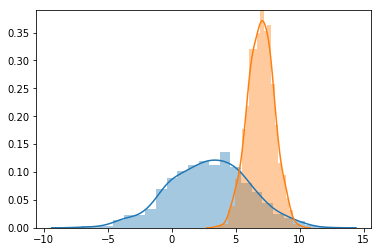

In [19]:
# duas distribuições
x1 = np.random.normal(loc=3, scale=3, size=N)
x2 = np.random.normal(loc=7, scale=1, size=N)

sns.distplot(x1, kde=True)
sns.distplot(x2, kde=True)

print('x1', x1.mean(), x1.std())
print('x2', x2.mean(), x2.std())

x1_prime -7.81597009336e-17 1.0
x2_prime 2.16715534407e-16 1.0


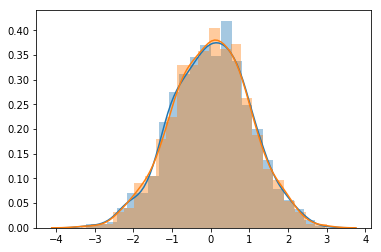

In [20]:
x1_prime = (x1 - x1.mean()) / x1.std()
x2_prime = (x2 - x2.mean()) / x2.std()

sns.distplot(x1_prime, kde=True)
sns.distplot(x2_prime, kde=True)

print('x1_prime', x1_prime.mean(), x1_prime.std())
print('x2_prime', x2_prime.mean(), x2_prime.std())

x1_prime -7.81597009336e-17 1.0
x2_prime 2.16715534407e-16 1.0


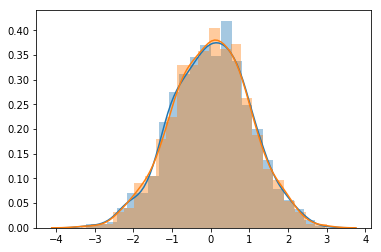

In [21]:
# usando o scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x1.reshape(-1, 1))
x1_prime = scaler.transform(x1.reshape(-1, 1)).reshape(-1)

x2_prime = scaler.fit_transform(x2.reshape(-1, 1)).reshape(-1)

sns.distplot(x1_prime, kde=True)
sns.distplot(x2_prime, kde=True)

print('x1_prime', x1_prime.mean(), x1_prime.std())
print('x2_prime', x2_prime.mean(), x2_prime.std())